In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()
x = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

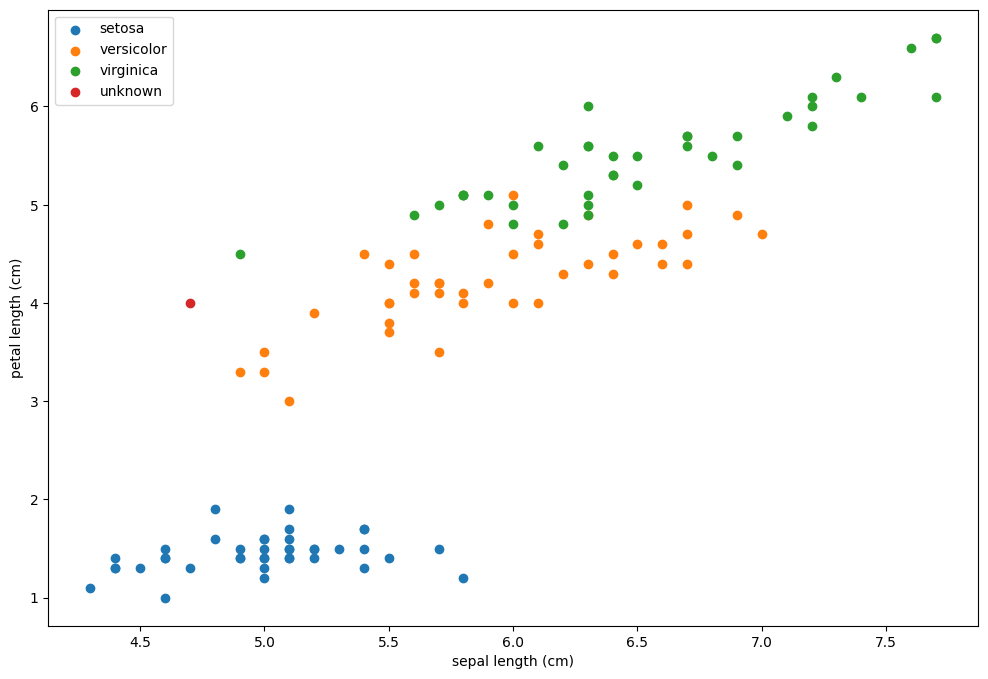

In [ ]:
df = pd.DataFrame(x_train, columns=data["feature_names"])
df["target"] = y_train
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.scatter(
        df.loc[df["target"] == i]["sepal length (cm)"],
        df.loc[df["target"] == i]["petal length (cm)"],
        label=data["target_names"][i]
    )
plt.scatter([4.7], [4], label="unknown")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()
plt.show()

In [ ]:
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, features, labels):
        self.features = features
        self.labels = labels

    def predict(self, x):
        distances = torch.sum((self.features - x) ** 2, axis=1)
        nearest_indices = torch.argsort(distances)[:self.k]
        unique_labels, label_counts = torch.unique(self.labels[nearest_indices], return_counts=True)
        most_common_label = unique_labels[label_counts.argmax()]
        return most_common_label

    def test_model(self, features, labels):
        predictions = [self.predict(x) for x in features]
        correct_predictions = torch.sum(torch.tensor(predictions) == labels)
        return correct_predictions.item() / len(labels)

In [ ]:
if __name__ == '__main__':
    model = KNN(3)
    model.fit(x_train, y_train)
    accuracy = model.test_model(x_test, y_test)
    print(f'Accuracy: {accuracy:}')

Accuracy: 1.0
